<a href="https://colab.research.google.com/github/Apurbo6461/Bracu_cse_422_AI_project/blob/main/422_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#dataset description

In [3]:
df = pd.read_csv('/content/drive/MyDrive/adult income dataset.csv')
display(df.head())

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df = pd.read_csv('/content/drive/MyDrive/adult income dataset.csv')
## print("First 5 rows of the dataset:")
print(df.head())
print(f"\nShape of dataset: {df.shape}\n")

# Dataset info and datatypes
print('\nDataset Information:')
print(df.info())

# Summary statistics for quantitative features
print('\nSummary statistics:')
print(df.describe())


   Age         Workclass  Final Weight  Education  Education Number of Years  \
0   39         State-gov         77516  Bachelors                         13   
1   50  Self-emp-not-inc         83311  Bachelors                         13   
2   38           Private        215646    HS-grad                          9   
3   53           Private        234721       11th                          7   
4   28           Private        338409  Bachelors                         13   

       Marital-status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital-gain  Capital-loss  Hours-per-week Native-country target  
0   

In [5]:
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['Age', 'Workclass', 'Final Weight', 'Education', 'Education Number of Years', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'target']


Correlation Analysis

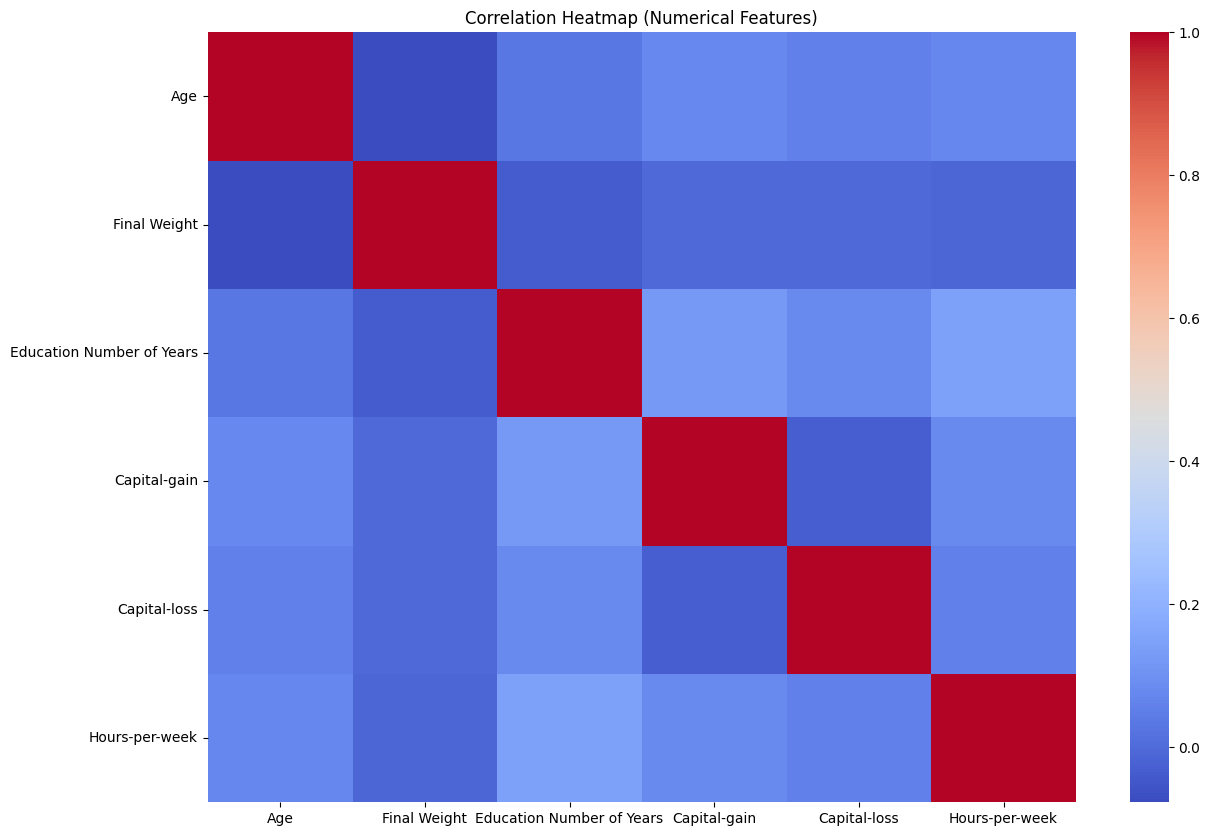

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14,10))
correlation_matrix = numeric_df.corr()

sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


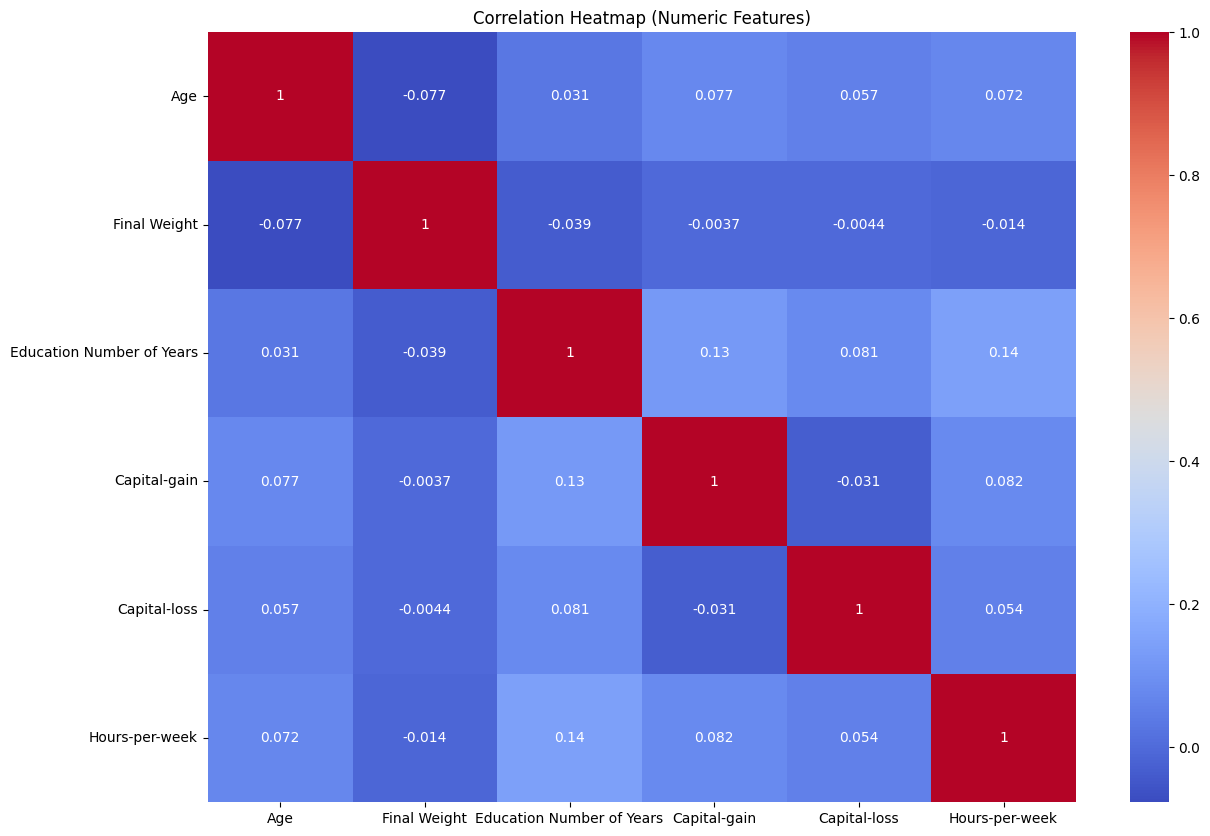

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14,10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


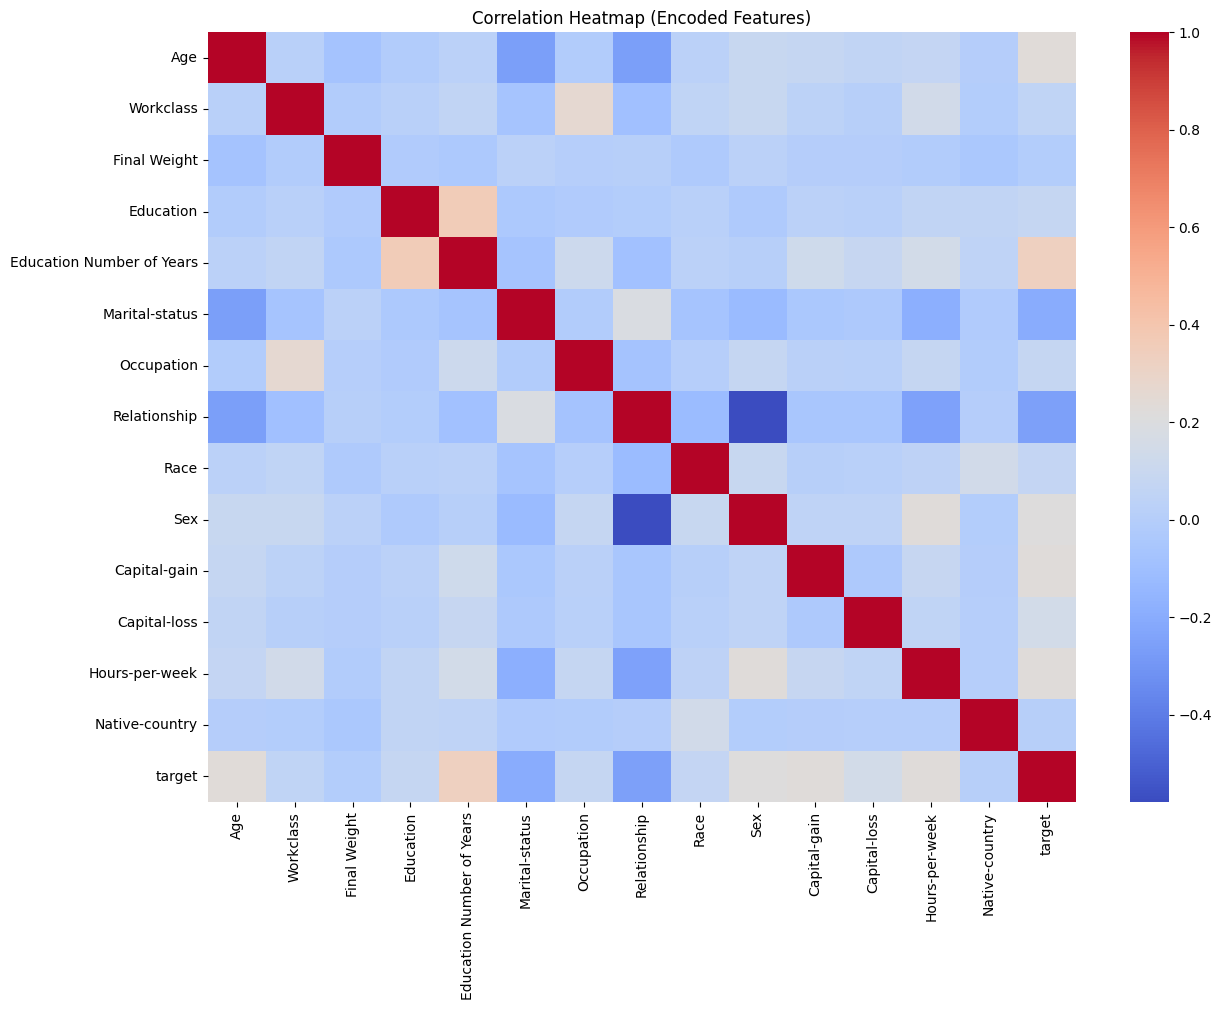

In [9]:
plt.figure(figsize=(14,10))
correlation_matrix = df_encoded.corr()

sns.heatmap(
    correlation_matrix,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Encoded Features)")
plt.show()


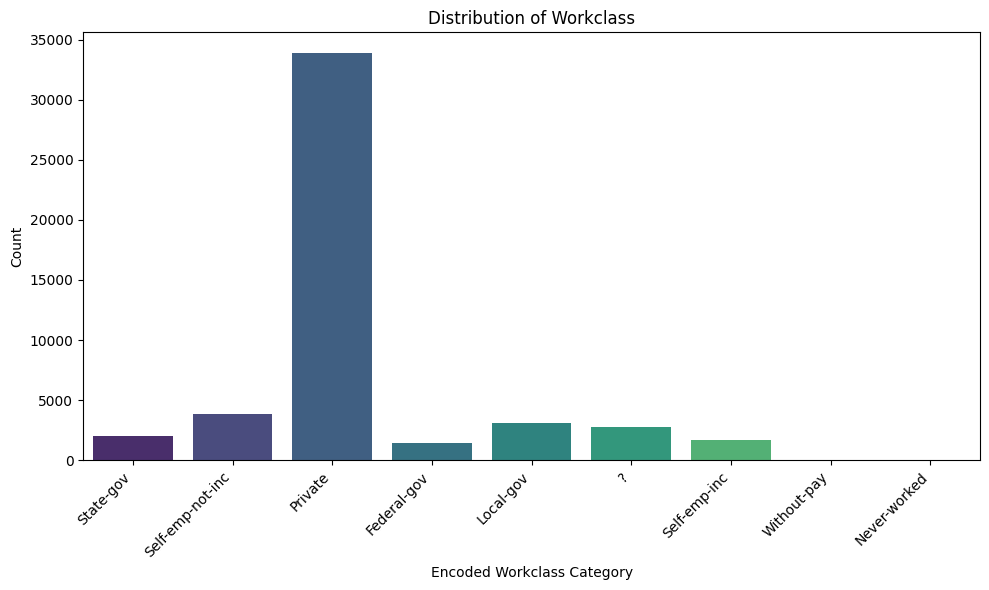

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Workclass', data=df, palette='viridis', hue='Workclass', legend=False)
plt.title('Distribution of Workclass')
plt.xlabel('Encoded Workclass Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🔹 Class Distribution Bar Chart

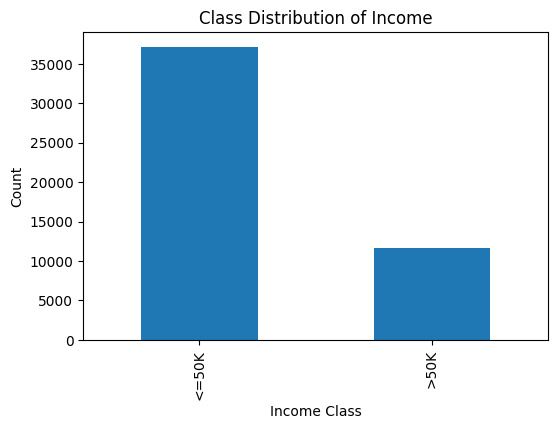

In [11]:
plt.figure(figsize=(6,4))
df['target'].value_counts().plot(kind='bar')
plt.title("Class Distribution of Income")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()
#imbalanced Dataset Visualization

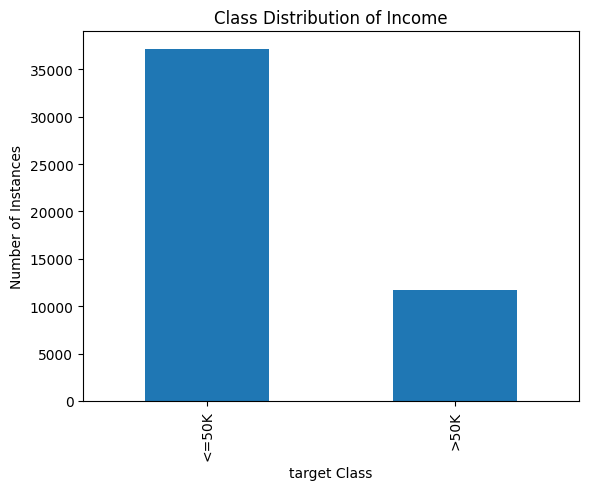

In [12]:
plt.figure()
df['target'].value_counts().plot(kind='bar')
plt.xlabel("target Class")
plt.ylabel("Number of Instances")
plt.title("Class Distribution of Income")
plt.show()


Exploratory Data Analysis (EDA)

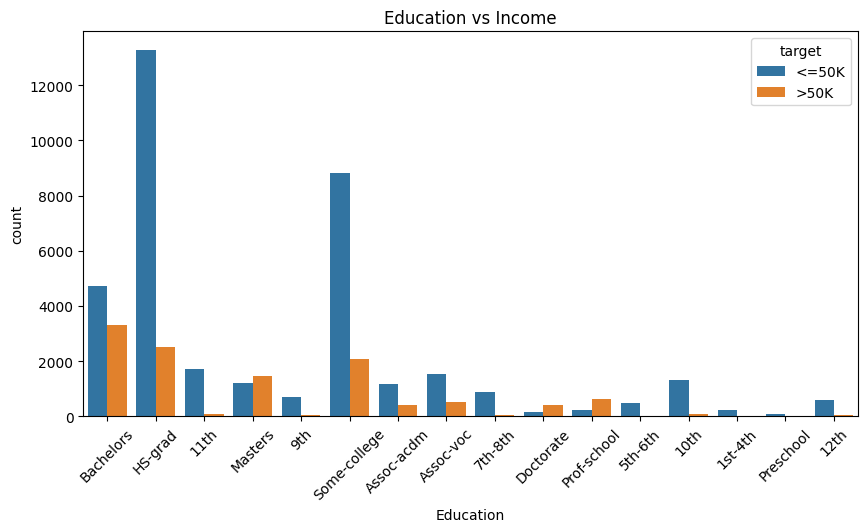

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education', hue='target', data=df)
plt.xticks(rotation=45)
plt.title("Education vs Income")
plt.show()

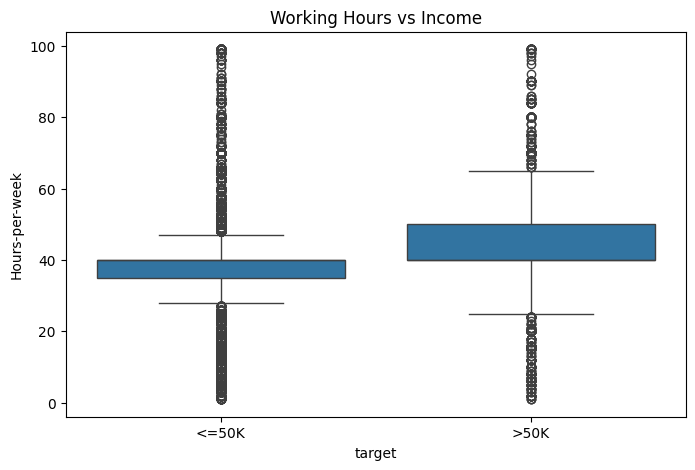

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='Hours-per-week', data=df)
plt.title("Working Hours vs Income")
plt.show()

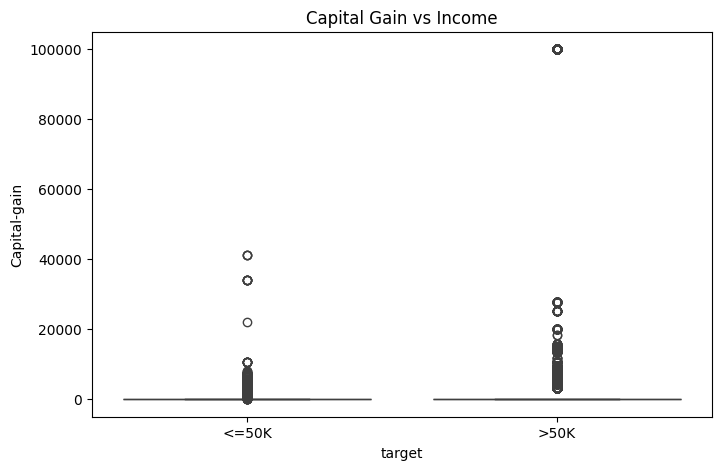

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='Capital-gain', data=df)
plt.title("Capital Gain vs Income")
plt.show()

In [16]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/adult income dataset.csv')

# View first few rows
df.head()

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Dataset pre-processing


In [17]:
# Replace '?' with NaN
df.replace(" ?", np.nan, inplace=True)

# Check missing values
df.isnull().sum()

,0
Age,0
Workclass,0
Final Weight,0
Education,0
Education Number of Years,0
Marital-status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [18]:
# Drop rows with missing values
df.dropna(inplace=True)

print("Dataset shape after removing missing values:", df.shape)

Dataset shape after removing missing values: (48842, 15)


In [19]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-country', 'target'],
      dtype='object')

In [20]:
# Apply Label Encoding
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
# Separate features and target
X = df.drop("target", axis=1)   # change target column name if needed
y = df["target"]


#spiliting


Train–Test Split (80% – 20%)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,        # 20% test data
    random_state=42,
    stratify=y            # Stratified splitting
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (39073, 14)
Testing set size: (9769, 14)


Step 1: Split Test Set

In [23]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y,
    test_size=0.15,       # 15% test
    random_state=42,
    stratify=y
)


Step 2: Split Validation Set

In [24]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,      # ≈15% of total
    random_state=42,
    stratify=y_temp
)


In [25]:
from sklearn.model_selection import train_test_split

# Use the X_scaled data, which has 14 features and is already scaled
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Model training & testing (Supervised)

1.KNN

2.Decition Tree (Classifier and regression)


3.Neural Network


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Model
knn = KNeighborsClassifier(n_neighbors=5)

# Training
knn.fit(X_train, y_train)

# Testing
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8264919643771113
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7431
           1       0.66      0.58      0.61      2338

    accuracy                           0.83      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8523902139420616
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7431
           1       0.77      0.55      0.64      2338

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.85      0.85      0.84      9769



In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_reg = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

dt_reg.fit(X_train, y_train)

y_pred_reg = dt_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R2 Score:", r2_score(y_test, y_pred_reg))

MSE: 0.1058464549064894
R2 Score: 0.41858696001726137


In [29]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(64,32),
                    activation='relu',
                    max_iter=300,
                    random_state=42)

nn.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [30]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

nn.fit(X_train, y_train)

y_pred_nn = nn.predict(X_test)

print("NN Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


NN Accuracy: 0.8469648889343843
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7431
           1       0.71      0.62      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



Kmeans and showcase the clusters

In [31]:
from sklearn.cluster import KMeans

# Remove target column
X_unsupervised = X_scaled

# KMeans Model
kmeans = KMeans(
    n_clusters=2,
    random_state=42
)

clusters = kmeans.fit_predict(X_unsupervised)

# Add cluster labels
df["Cluster"] = clusters

df["Cluster"].value_counts()



,count
Cluster,
0,28067
1,20775


In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_


In [33]:
df.groupby("Cluster").mean()


,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,target,cluster
Cluster,,,,,,,,,,,,,,,,
0,42.942495,4.061745,187345.119856,10.380376,10.356077,2.008765,6.982542,0.385506,3.779634,0.938326,1587.521324,115.746571,44.249332,36.849075,0.357430,0.253928
1,32.835764,3.611986,192797.120722,10.164188,9.702527,3.442840,6.030758,2.872347,3.517304,0.303923,392.147292,49.344356,35.252178,36.614633,0.079663,0.266667


#Comparison analysis


Accuracy Comparison

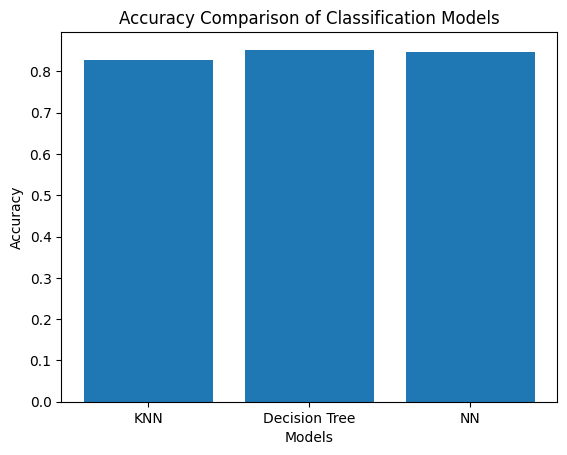

In [34]:
import matplotlib.pyplot as plt

models = ['KNN', 'Decision Tree', 'NN']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nn)
]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classification Models")
plt.show()


Precision & Recall Comparison

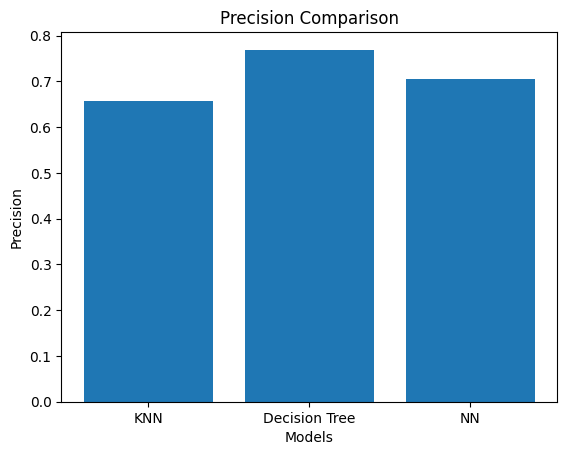

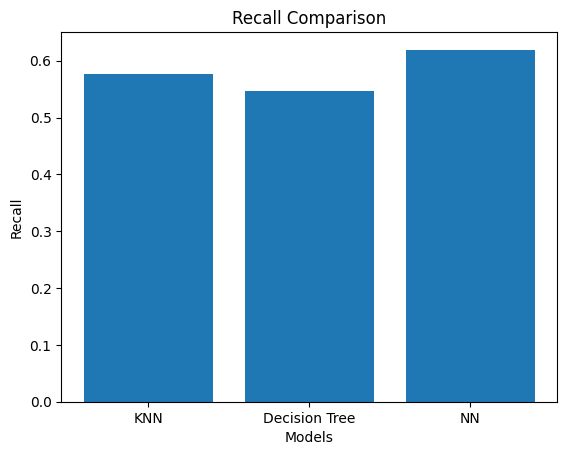

In [35]:
from sklearn.metrics import precision_score, recall_score

precision = [
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_nn)
]

recall = [
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_nn)
]

plt.figure()
plt.bar(models, precision)
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Precision Comparison")
plt.show()

plt.figure()
plt.bar(models, recall)
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Recall Comparison")
plt.show()


Confusion Matrix (Classification)

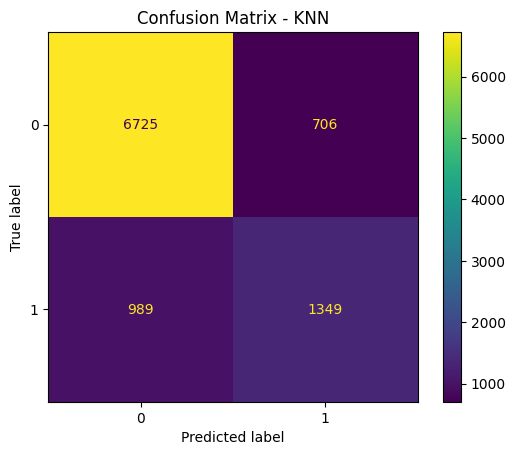

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()


<Figure size 640x480 with 0 Axes>

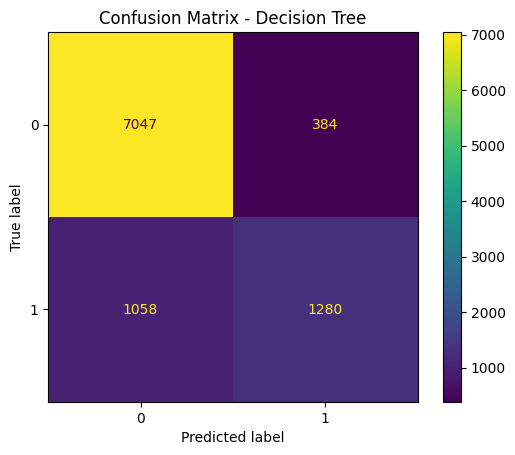

In [37]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure()
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()


<Figure size 640x480 with 0 Axes>

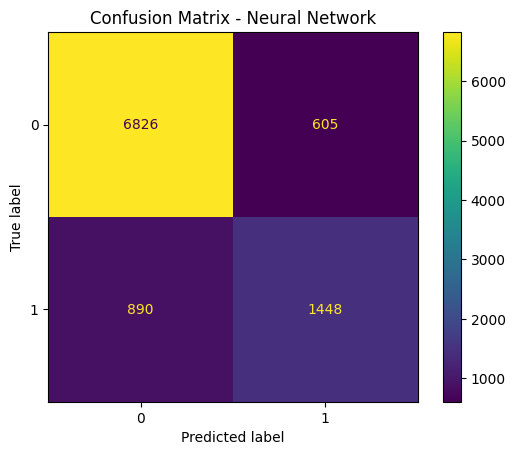

In [38]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure()
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot()
plt.title("Confusion Matrix - Neural Network")
plt.show()

ROC Curve & AUC Score (Classification)

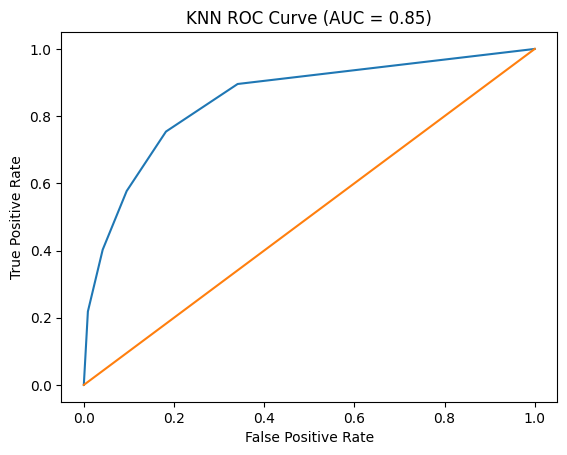

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_knn = knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"KNN ROC Curve (AUC = {auc_knn:.2f})")
plt.show()


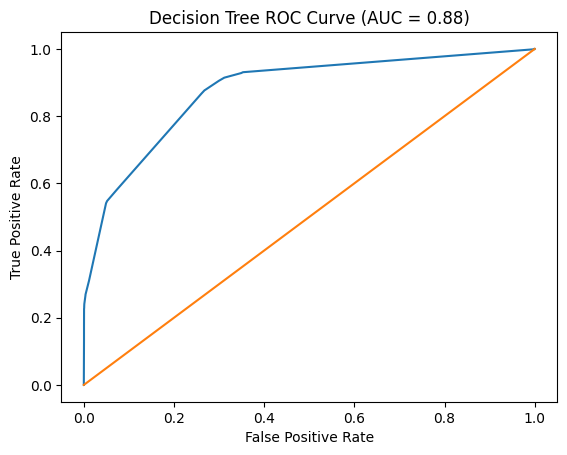

In [40]:
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Decision Tree ROC Curve (AUC = {auc_dt:.2f})")
plt.show()


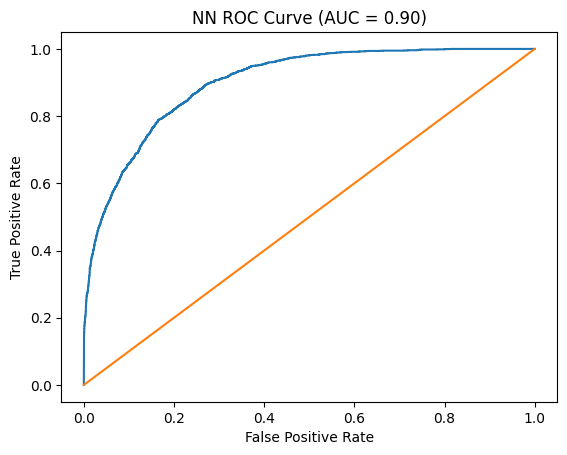

In [41]:
y_prob_ann = nn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_ann)
auc_ann = roc_auc_score(y_test, y_prob_ann)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"NN ROC Curve (AUC = {auc_ann:.2f})")
plt.show()


Regression Evaluation (Decision Tree Regressor)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print("Regression Loss (MSE):", mse)
print("R² Score:", r2)


Regression Loss (MSE): 0.1058464549064894
R² Score: 0.41858696001726137


In [43]:
results = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precision,
    "Recall": recall,
    "AUC": [auc_knn, auc_dt, auc_ann]
})
results

,Model,Accuracy,Precision,Recall,AUC
0,KNN,0.826492,0.656448,0.576989,0.850823
1,Decision Tree,0.852390,0.769231,0.547476,0.876292
2,NN,0.846965,0.705309,0.619333,0.900088


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = nn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Evaluation Metrics

[[6826  605]
 [ 890 1448]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7431
           1       0.71      0.62      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

